**Bayu Triadi Putra** **-** **Universitas Indraprasta PGRI**

In [206]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [207]:
# importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from yellowbrick.cluster import KElbowVisualizer


import statsmodels.api as sm

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

In [91]:
# Membaca dataset
df_customer = pd.read_csv(r'/content/drive/MyDrive/PBI Kalbe Data Science/Customer.csv', delimiter=';')
df_product = pd.read_csv(r'/content/drive/MyDrive/PBI Kalbe Data Science/Product.csv', delimiter=';')
df_store = pd.read_csv(r'/content/drive/MyDrive/PBI Kalbe Data Science/Store.csv', delimiter=';')
df_transaction = pd.read_csv(r'/content/drive/MyDrive/PBI Kalbe Data Science/Transaction.csv', delimiter=';')

In [92]:
def check_and_clean_data(df):
    # Initial counts of duplicates and missing data
    initial_duplicates = df.duplicated().sum()
    initial_missing = df.isnull().sum().sum()

    # Print initial counts
    print("Initial Count of Duplicates:", initial_duplicates)
    print("Initial Count of Missing Data:", initial_missing)

    # Dropping duplicates and missing values
    df_cleaned = df.drop_duplicates()
    df_cleaned = df_cleaned.dropna()

    # Final counts of duplicates and missing data
    final_duplicates = df_cleaned.duplicated().sum()
    final_missing = df_cleaned.isnull().sum().sum()

    # Print final counts
    print("Final Count of Duplicates:", final_duplicates)
    print("Final Count of Missing Data:", final_missing)

    return df_cleaned

In [93]:
#Data cleaning for customer csv file
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [94]:
# Data cleansing for df_customer by replacing ',' with '.' for the 'Income' column
df_customer['Income'] = df_customer['Income'].replace('[,]', '.', regex=True).astype('float')


In [ ]:
df_customer = check_and_clean_data(df_customer)

Initial Count of Duplicates: 0
Initial Count of Missing Data: 3
Final Count of Duplicates: 0
Final Count of Missing Data: 0


In [ ]:
#Data cleaning for product csv file

In [130]:
df_product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [ ]:
df_product = check_and_clean_data(df_product)

Initial Count of Duplicates: 0
Initial Count of Missing Data: 0
Final Count of Duplicates: 0
Final Count of Missing Data: 0


In [ ]:
#Data cleaning for store csv file

In [ ]:
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [ ]:
# Data cleansing for df_store by replacing ',' with '.'
df_store['Latitude'] = df_store['Latitude'].replace('[,]', '.', regex=True).astype('float')
df_store['Longitude'] = df_store['Longitude'].replace('[,]', '.', regex=True).astype('float')

In [ ]:
df_store = check_and_clean_data(df_store)

Initial Count of Duplicates: 0
Initial Count of Missing Data: 0
Final Count of Duplicates: 0
Final Count of Missing Data: 0


In [ ]:
#Data cleaning for transaction csv file

In [ ]:
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [ ]:
df_transaction = check_and_clean_data(df_transaction)

Initial Count of Duplicates: 0
Initial Count of Missing Data: 0
Final Count of Duplicates: 0
Final Count of Missing Data: 0


In [ ]:
# Data cleansing for df_transaction by changing the Date format to datetime
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])

In [ ]:
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,2022-01-01,P3,7500,4,30000,12
1,TR16356,165,2022-01-01,P9,10000,7,70000,1
2,TR1984,183,2022-01-01,P1,8800,4,35200,4
3,TR35256,160,2022-01-01,P1,8800,7,61600,4
4,TR41231,386,2022-01-01,P9,10000,1,10000,4


In [ ]:
print(df_transaction['TransactionID'].value_counts())

TR71313    3
TR42197    2
TR90402    2
TR74019    2
TR49649    2
          ..
TR29792    1
TR23081    1
TR1691     1
TR98388    1
TR85684    1
Name: TransactionID, Length: 4908, dtype: int64


In [ ]:
print(df_transaction[df_transaction['TransactionID'] == 'TR71313'])
print(df_transaction[df_transaction['TransactionID'] == 'TR42197'])

     TransactionID  CustomerID       Date ProductID  Price  Qty  TotalAmount  \
1982       TR71313         117 2022-05-21        P1   8800   10        88000   
3336       TR71313         401 2022-08-30        P3   7500    6        45000   
3722       TR71313         370 2022-09-26        P3   7500    2        15000   

      StoreID  
1982        8  
3336       11  
3722        3  
     TransactionID  CustomerID       Date ProductID  Price  Qty  TotalAmount  \
1574       TR42197         181 2022-04-23        P5   4200    4        16800   
3711       TR42197          24 2022-09-26        P8  16000    2        32000   

      StoreID  
1574       12  
3711       13  


Dari hasil di atas terlihat bahwa beberapa ID Transaksi digunakan untuk ID Pelanggan yang berbeda pada tanggal yang berbeda. Ini mungkin menunjukkan kesalahan atau ketidakkonsistenan input data

In [ ]:
# Group by 'TransactionID' and select the row with the maximum 'Date'
df_transaction = df_transaction.sort_values(by='Date', ascending=False) \
    .groupby('TransactionID', as_index=False).first()

In [ ]:
print(df_transaction[df_transaction['TransactionID'] == 'TR71313'])
print(df_transaction[df_transaction['TransactionID'] == 'TR42197'])

     TransactionID  CustomerID       Date ProductID  Price  Qty  TotalAmount  \
3309       TR71313         370 2022-09-26        P3   7500    2        15000   

      StoreID  
3309        3  
     TransactionID  CustomerID       Date ProductID  Price  Qty  TotalAmount  \
1762       TR42197          24 2022-09-26        P8  16000    2        32000   

      StoreID  
1762       13  


In [ ]:
#merge all data

In [ ]:
# Merge the DataFrames
df_merge = pd.merge(df_transaction, df_customer, on='CustomerID', how='inner')
df_merge = pd.merge(df_merge, df_product.drop(columns=('Price')), on='ProductID', how='inner')
df_merge = pd.merge(df_merge, df_store, on='StoreID', how='inner')


In [ ]:
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR10008,235,2022-05-21,P8,16000,2,32000,4,37,0,Married,5.35,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664
1,TR39070,350,2022-06-23,P8,16000,2,32000,4,38,0,Single,7.95,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664
2,TR8584,293,2022-09-14,P8,16000,3,48000,4,54,0,Married,10.40,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664
3,TR69229,46,2022-05-07,P8,16000,2,32000,4,36,1,Married,8.31,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,TR88920,447,2022-01-16,P8,16000,1,16000,4,54,1,Married,20.37,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664


In [ ]:
#machine learning: regression

In [ ]:
df_regresi = df_merge.groupby(['Date']).agg({
    'Qty' : 'sum'
}).reset_index()

In [ ]:
df_regresi

,Date,Qty
0,2022-01-01,47
1,2022-01-02,45
2,2022-01-03,67
3,2022-01-04,98
4,2022-01-05,57
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,40


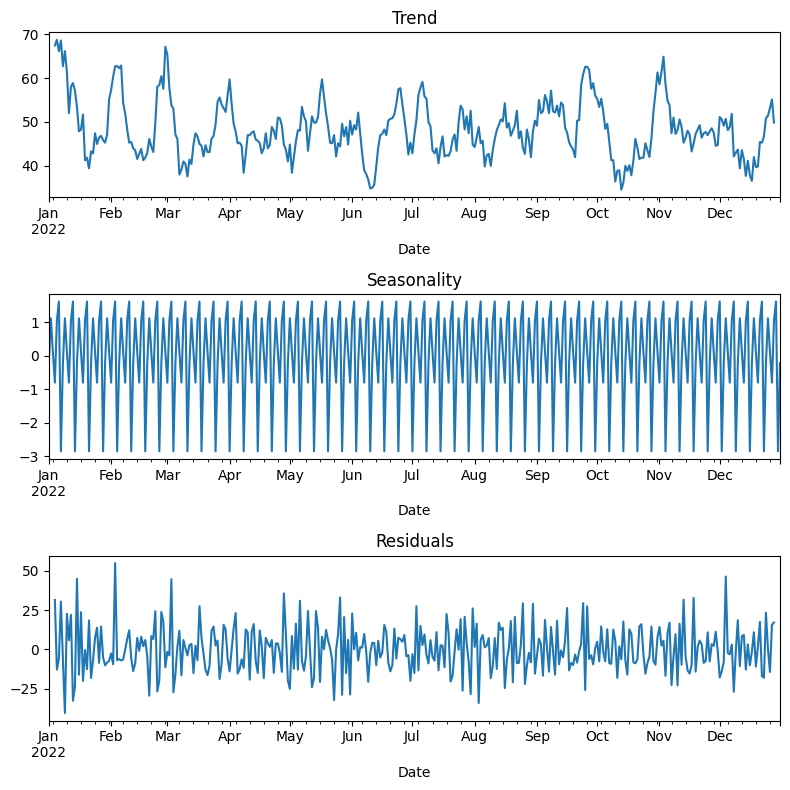

In [ ]:
decomposed = seasonal_decompose(df_regresi.set_index('Date'))

plt.figure(figsize=(8, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

**Check Stationary Data**

In [95]:
cut_off = round(df_regresi.shape[0]*0.8)
df_train = df_regresi[:cut_off]
df_test = df_regresi[cut_off:].reset_index(drop=True)
df_train.shape, df_train.shape

((292, 2), (292, 2))

In [ ]:
df_train

,Date,Qty
0,2022-01-01,47
1,2022-01-02,45
2,2022-01-03,67
3,2022-01-04,98
4,2022-01-05,57
...,...,...
287,2022-10-15,33
288,2022-10-16,24
289,2022-10-17,53
290,2022-10-18,47


In [137]:
df_test

,Qty
Date,
2022-10-20,39
2022-10-21,35
2022-10-22,56
2022-10-23,59
2022-10-24,39
...,...
2022-12-27,70
2022-12-28,68
2022-12-29,42


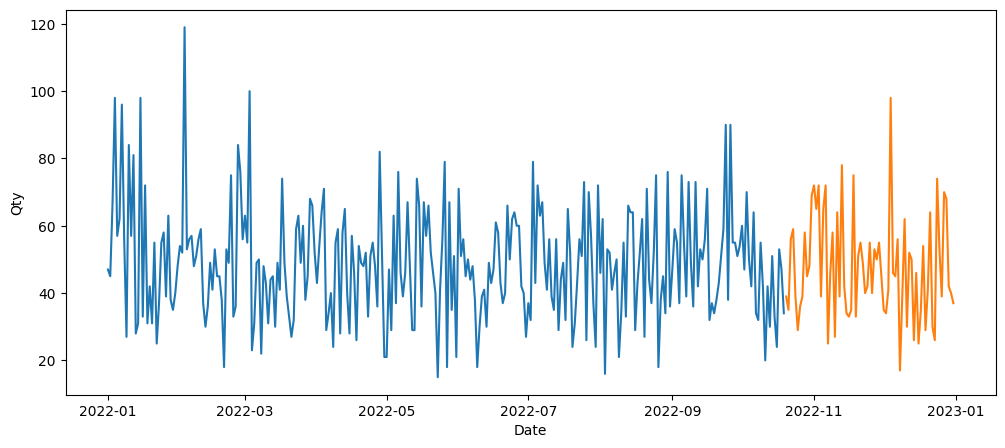

In [150]:
plt.figure(figsize=(12,5))
sns.lineplot(data=train, x=train.index, y=train['Qty'])
sns.lineplot(data=test, x=test.index, y=test['Qty'])
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_regresi['Qty'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -19.382389
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


Berdasarkan uji *Dickey-Fuller* data stasioner karena p-value < 0,05

**Choosing p, d, and q value**

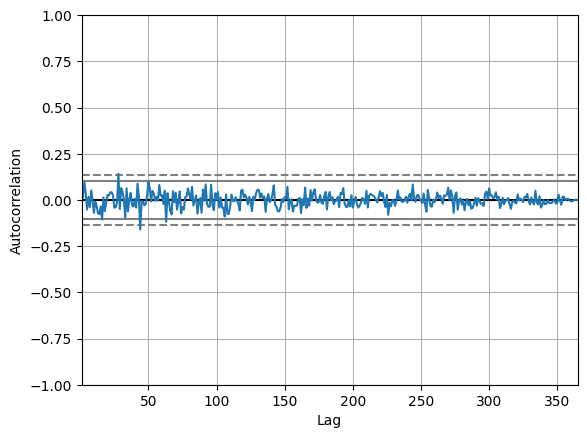

In [97]:
autocorrelation_plot(df_regresi['Qty']);

**Choosing p, d, and q values**

In [98]:
import itertools

p=range(0,20)
q=range(0,10)
d=range(0,2)

pdq_combinations=list(itertools.product(p,d,q))
print(len(pdq_combinations))
print(pdq_combinations)

400
[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 0, 5), (0, 0, 6), (0, 0, 7), (0, 0, 8), (0, 0, 9), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 1, 6), (0, 1, 7), (0, 1, 8), (0, 1, 9), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 0, 5), (1, 0, 6), (1, 0, 7), (1, 0, 8), (1, 0, 9), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 1, 5), (1, 1, 6), (1, 1, 7), (1, 1, 8), (1, 1, 9), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 0, 5), (2, 0, 6), (2, 0, 7), (2, 0, 8), (2, 0, 9), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 1, 5), (2, 1, 6), (2, 1, 7), (2, 1, 8), (2, 1, 9), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 0, 4), (3, 0, 5), (3, 0, 6), (3, 0, 7), (3, 0, 8), (3, 0, 9), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 1, 5), (3, 1, 6), (3, 1, 7), (3, 1, 8), (3, 1, 9), (4, 0, 0), (4, 0, 1), (4, 0, 2), (4, 0, 3), (4, 0, 4), (4, 0, 5), (4, 0, 6), (4, 0, 7), (4, 0, 8), (4, 0, 9), (4, 1

In [ ]:
cut_off = round(df_regresi.shape[0]*0.8)
train = df_regresi[:cut_off]
test = df_regresi[cut_off:].reset_index(drop=True)
train.shape, train.shape

((292, 2), (292, 2))

In [100]:
rmse=[]
order1=[]

train = train.set_index('Date')
test = test.set_index('Date')
y = train['Qty']

for pdq in pdq_combinations:
  try:
    model=ARIMA(train, order=pdq).fit()
    pred=model.predict(start=len(train), end=(len(df_regresi)-1))
    error=np.sqrt(mean_squared_error(test,pred))
    order1.append(pdq)
    rmse.append(error)

  except:
    continue

results=pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

In [102]:
results.head()

,RMSE
"(0, 0, 0)",15.498891
"(0, 0, 1)",15.500789
"(0, 0, 2)",15.494289
"(0, 0, 3)",15.506735
"(0, 0, 4)",15.503433


In [103]:
sorted_results = results.sort_values(by='RMSE', ascending=True)
sorted_results

,RMSE
"(9, 1, 6)",14.904891
"(8, 1, 3)",14.974696
"(9, 1, 9)",15.224293
"(13, 1, 9)",15.315993
"(7, 0, 5)",15.383777
...,...
"(12, 1, 0)",17.519169
"(15, 1, 0)",17.526943
"(13, 1, 0)",17.575892
"(1, 1, 0)",17.863020


In [104]:
file_path = '/content/drive/MyDrive/PBI Kalbe Data Science/pdq_values2.csv'
sorted_results.to_csv(file_path, index=False)

**ARIMA**

RMSE value: 14.904890767304556
MAE value: 12.237725563756841


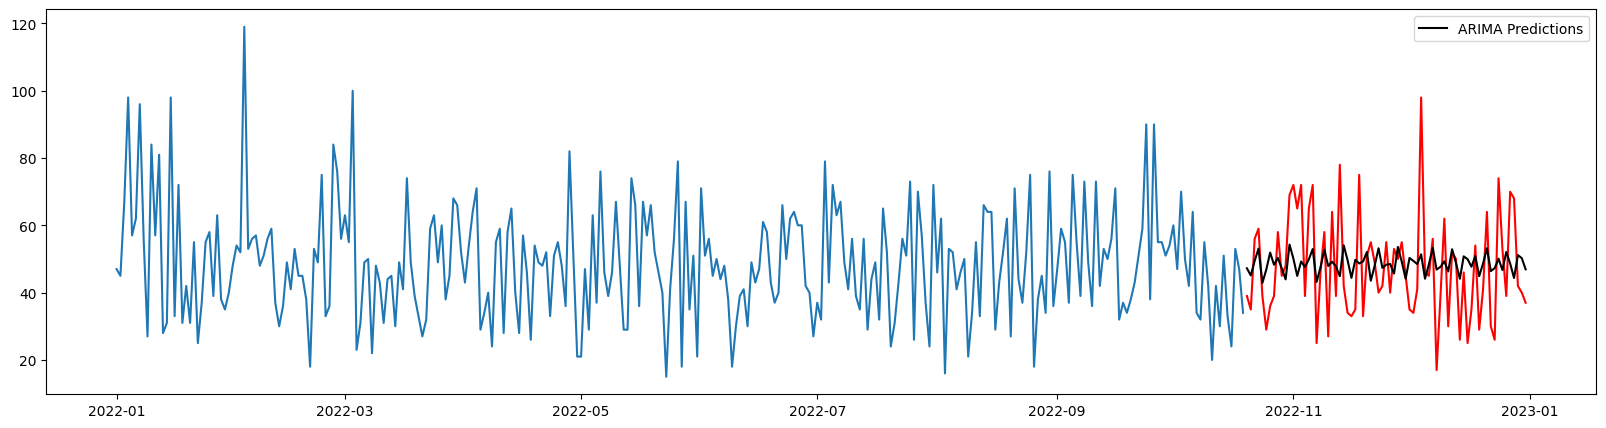

In [105]:
def calculate_rmse(y_actual, y_pred):
    '''
    Function to calculate RMSE
    '''
    return mean_squared_error(y_actual, y_pred) ** 0.5

def evaluate_model(y_actual, y_pred):
    '''
    Function to evaluate machine learning model
    '''
    rmse = calculate_rmse(y_actual, y_pred)
    mae = mean_absolute_error(y_actual, y_pred)
    return rmse, mae

# Your existing code
df_train = df_train.set_index('Date')
df_test = df_test.set_index('Date')
y = df_train['Qty']

ARIMAmodel = ARIMA(y, order=(9, 1, 6)).fit()

y_pred = ARIMAmodel.get_forecast(len(df_test))

y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] = ARIMAmodel.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df['predictions']

rmse_value, mae_value = evaluate_model(df_test['Qty'], y_pred_out)

plt.figure(figsize=(20, 5))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color='red')
plt.plot(y_pred_out, color='black', label='ARIMA Predictions')
plt.legend()

print(f'RMSE value: {rmse_value}')
print(f'MAE value: {mae_value}')

In [106]:
y_pred_out

Date
2022-10-20    47.234337
2022-10-21    45.110339
2022-10-22    49.459151
2022-10-23    53.096509
2022-10-24    42.884084
                ...    
2022-12-27    48.649411
2022-12-28    44.341439
2022-12-29    51.157334
2022-12-30    50.252839
2022-12-31    46.938439
Name: predictions, Length: 73, dtype: float64

**Predict Future Data**

In [107]:
#Build model on full dataset
y_reg = df_regresi.set_index('Date')
y_reg = y_reg['Qty']
final_model = ARIMA(y_reg, order=(9, 1, 6)).fit()
#Forecast for the next 30 days
prediction = final_model.predict(len(y_reg), len(y_reg)+30)

In [108]:
prediction

2023-01-01    53.223719
2023-01-02    45.159852
2023-01-03    40.340977
2023-01-04    53.630976
2023-01-05    51.183026
2023-01-06    45.569203
2023-01-07    49.259259
2023-01-08    44.081928
2023-01-09    50.198473
2023-01-10    55.256973
2023-01-11    43.111084
2023-01-12    45.635120
2023-01-13    51.507544
2023-01-14    47.641462
2023-01-15    52.089562
2023-01-16    46.983555
2023-01-17    42.163473
2023-01-18    53.499379
2023-01-19    51.232534
2023-01-20    45.200315
2023-01-21    49.229659
2023-01-22    45.471149
2023-01-23    49.664849
2023-01-24    54.253297
2023-01-25    43.720920
2023-01-26    45.734461
2023-01-27    51.859371
2023-01-28    47.724045
2023-01-29    50.854243
2023-01-30    47.492745
2023-01-31    43.133361
Freq: D, Name: predicted_mean, dtype: float64

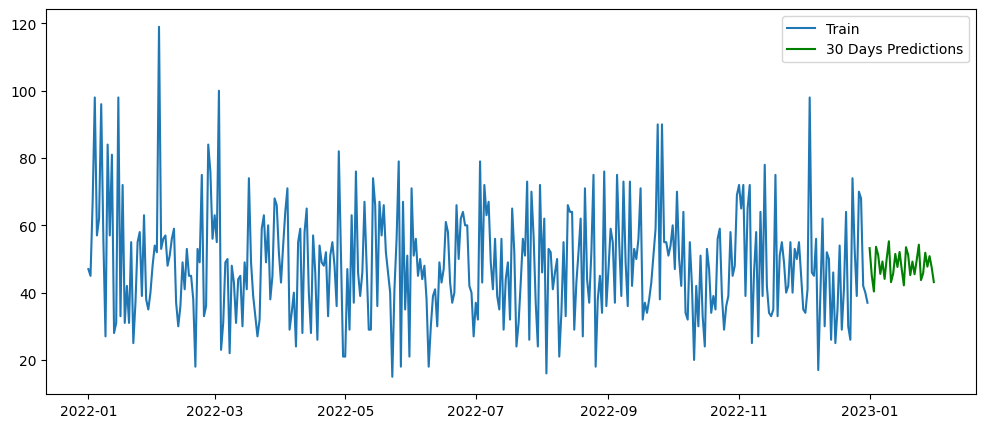

In [153]:
plt.figure(figsize=(12, 5))
plt.plot(y_reg, label='Train')
plt.plot(prediction, color='green', label='30 Days Predictions')
plt.legend()

In [155]:
prediction.describe()

count    31.000000
mean     48.261500
std       3.985978
min      40.340977
25%      45.335732
50%      47.724045
75%      51.370039
max      55.256973
Name: predicted_mean, dtype: float64

Dari perkiraan rata-rata kuantitas penjualan pada bulan Januari 2023 adalah 48.261500 atau dibulatkan menjadi sekitar 48 pcs/hari.

**Clustering**

In [252]:
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR10008,235,2022-05-21,P8,16000,2,32000,4,37,0,Married,5.35,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664
1,TR39070,350,2022-06-23,P8,16000,2,32000,4,38,0,Single,7.95,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664
2,TR8584,293,2022-09-14,P8,16000,3,48000,4,54,0,Married,10.40,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664
3,TR69229,46,2022-05-07,P8,16000,2,32000,4,36,1,Married,8.31,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,TR88920,447,2022-01-16,P8,16000,1,16000,4,54,1,Married,20.37,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664


In [253]:
# Calculate the correlation matrix
correlation_matrix = df_merge.corr()
correlation_matrix

,CustomerID,Price,Qty,TotalAmount,StoreID,Age,Gender,Income,Latitude,Longitude
CustomerID,1.000000,-0.016848,-0.013039,-0.027297,0.008386,-0.022445,-0.018030,0.004778,0.006296,-0.006894
Price,-0.016848,1.000000,-0.353870,0.440091,-0.031161,0.014174,0.011297,0.001985,-0.026628,0.018088
Qty,-0.013039,-0.353870,1.000000,0.621611,0.011983,-0.026400,-0.010760,-0.032228,-0.008123,0.006392
TotalAmount,-0.027297,0.440091,0.621611,1.000000,-0.012294,-0.015377,-0.009347,-0.027208,-0.031321,0.026888
StoreID,0.008386,-0.031161,0.011983,-0.012294,1.000000,-0.007778,-0.002103,0.003226,0.469529,-0.096025
Age,-0.022445,0.014174,-0.026400,-0.015377,-0.007778,1.000000,-0.026988,0.485602,0.007204,0.020950
Gender,-0.018030,0.011297,-0.010760,-0.009347,-0.002103,-0.026988,1.000000,-0.066849,-0.010182,-0.000047
Income,0.004778,0.001985,-0.032228,-0.027208,0.003226,0.485602,-0.066849,1.000000,0.019291,0.002871
Latitude,0.006296,-0.026628,-0.008123,-0.031321,0.469529,0.007204,-0.010182,0.019291,1.000000,-0.393545
Longitude,-0.006894,0.018088,0.006392,0.026888,-0.096025,0.020950,-0.000047,0.002871,-0.393545,1.000000


Berdasarkan matriks korelasi dan mempertimbangkan tujuan mengelompokkan pelanggan serupa, kita dapat menggunakan Qty atau TotalAmount sebagai parameter karena nilai korelasinya serupa. Untuk model ini, saya menggunakan TotalAmount sebagai parameternya.

In [384]:
df_cluster = df_merge.groupby(['CustomerID']).agg({
    'TransactionID': 'count',
    'Qty':'sum',
    'TotalAmount': 'sum'
}).reset_index()
df_cluster

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,12,56,382300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
439,442,13,37,269400
440,444,18,62,577700
441,445,17,62,530800
442,446,11,42,423300


In [364]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     444 non-null    int64
 1   TransactionID  444 non-null    int64
 2   Qty            444 non-null    int64
 3   TotalAmount    444 non-null    int64
dtypes: int64(4)
memory usage: 14.0 KB


In [365]:
df_cluster = df_cluster.drop(columns = ['CustomerID'])
df_cluster.head()

,TransactionID,Qty,TotalAmount
0,17,60,623300
1,12,56,382300
2,15,56,446200
3,10,46,302500
4,7,27,268600


In [366]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   TransactionID  444 non-null    int64
 1   Qty            444 non-null    int64
 2   TotalAmount    444 non-null    int64
dtypes: int64(3)
memory usage: 10.5 KB


In [367]:
df_cluster.isna().sum()

TransactionID    0
Qty              0
TotalAmount      0
dtype: int64

In [368]:
#Standarisasi dataset
X = df_cluster.values
X_std = StandardScaler().fit_transform(X)
df_std = pd.DataFrame(data=X_std,columns=df_cluster.columns)
df_std.isna().sum()

TransactionID    0
Qty              0
TotalAmount      0
dtype: int64

In [369]:
#Normalisasi dataset dengan minmaxscaler
X_norm = MinMaxScaler().fit_transform(X)
X_norm

array([[0.77777778, 0.72463768, 0.7077064 ],
       [0.5       , 0.66666667, 0.39238519],
       [0.66666667, 0.66666667, 0.4759911 ],
       ...,
       [0.77777778, 0.75362319, 0.58668062],
       [0.44444444, 0.46376812, 0.44602905],
       [0.5       , 0.39130435, 0.41789873]])

In [327]:
# Normalisasi dataset dengan preprocessing sklearn
X_norm2 = preprocessing.normalize(df_cluster)
X_norm2

array([[2.72741856e-05, 9.62618317e-05, 9.99999995e-01],
       [3.13889612e-05, 1.46481819e-04, 9.99999989e-01],
       [3.36172117e-05, 1.25504257e-04, 9.99999992e-01],
       ...,
       [3.20271286e-05, 1.16804822e-04, 9.99999993e-01],
       [2.59862980e-05, 9.92204105e-05, 9.99999995e-01],
       [2.98656046e-05, 9.20856143e-05, 9.99999995e-01]])

In [329]:
X_std

array([[ 1.86692367,  1.59342178,  2.17875283],
       [ 0.32274686,  1.27737118,  0.23569338],
       [ 1.24925294,  1.27737118,  0.75088632],
       ...,
       [ 1.86692367,  1.75144708,  1.43297275],
       [ 0.0139115 ,  0.17119408,  0.56625536],
       [ 0.32274686, -0.22386918,  0.39291188]])

In [370]:
df_std

,TransactionID,Qty,TotalAmount
0,1.866924,1.593422,2.178753
1,0.322747,1.277371,0.235693
2,1.249253,1.277371,0.750886
3,-0.294924,0.487245,-0.407693
4,-1.221430,-1.013996,-0.681011
...,...,...,...
439,0.631582,-0.223869,-0.674561
440,2.175759,1.751447,1.811103
441,1.866924,1.751447,1.432973
442,0.013912,0.171194,0.566255


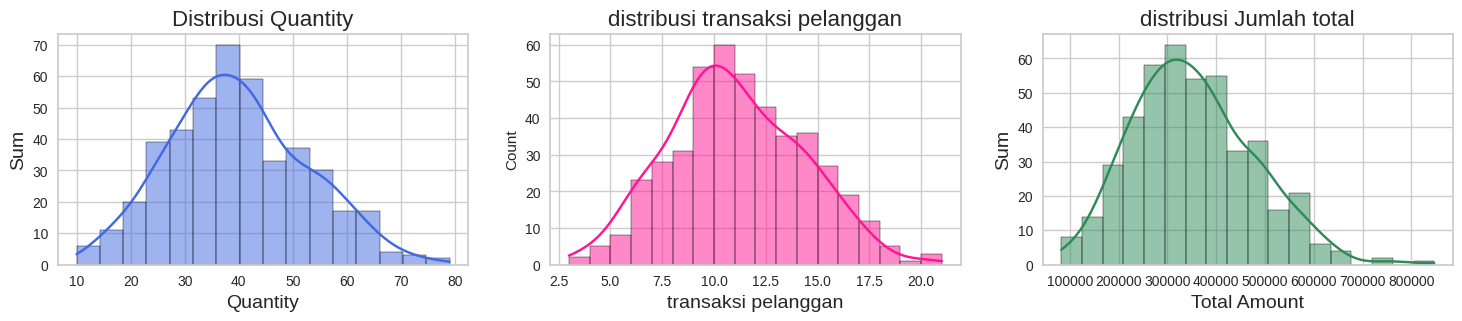

In [331]:
plt.figure(figsize=(18,3))

plt.subplot(1,3,1)
sns.histplot(df_cluster['Qty'], color='royalblue', kde= True)
plt.title('Distribusi Quantity', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Sum', fontsize=14)

plt.subplot(1,3,2)
sns.histplot(df_cluster['TransactionID'], color='deeppink', kde= True)
plt.title('distribusi transaksi pelanggan', fontsize=16)
plt.xlabel('transaksi pelanggan', fontsize=14)


plt.subplot(1,3,3)
sns.histplot(df_cluster['TotalAmount'], color='seagreen', kde= True)
plt.title('distribusi Jumlah total', fontsize=16)
plt.xlabel('Total Amount', fontsize=14)
plt.ylabel('Sum', fontsize=14)

#plt.tight_layout()

plt.show()

In [372]:
wcss= []
for n in range (1,11):
    model1 = KMeans(n_clusters=n, init='k-means++', n_init = 10, max_iter=100, tol =0.0001, random_state = 100)
    model1.fit(X_std)
    wcss.append(model1.inertia_)
print(wcss)

[1332.000000000001, 539.8095513602723, 312.7199671724567, 236.95623148253225, 190.99921497265044, 170.6951399861308, 157.29619527780739, 142.45290331421853, 131.35247589106956, 122.89538570353074]


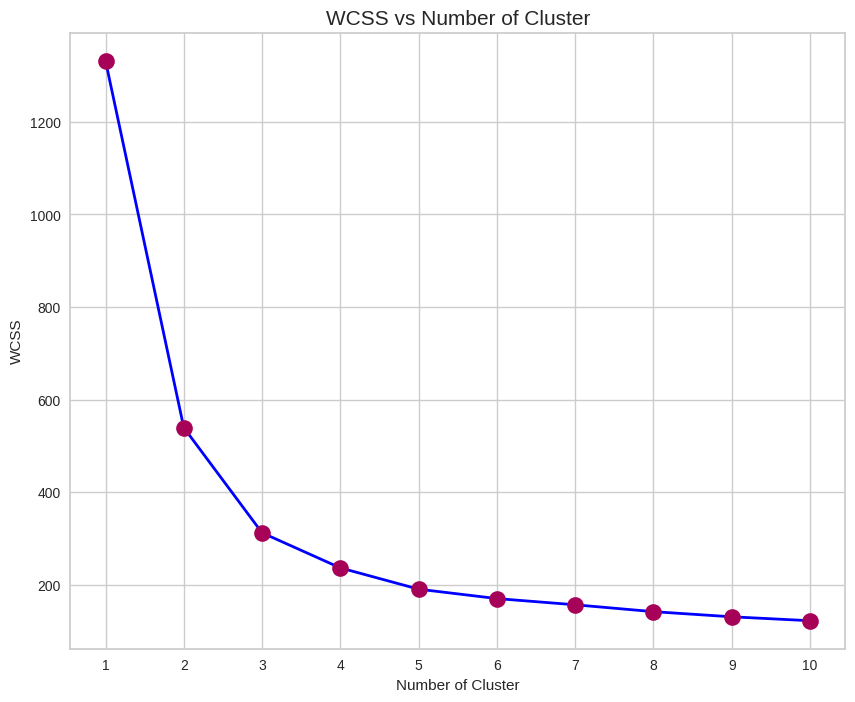

In [373]:
plt.figure(figsize=(10,8))
plt.plot(list(range(1,11)), wcss, color = 'blue', marker = 'o', linewidth=2, markersize=12, markerfacecolor= 'm',
         markeredgecolor= 'm')
plt.title('WCSS vs Number of Cluster', fontsize = 15)
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.xticks(list(range(1,11)))
plt.show()

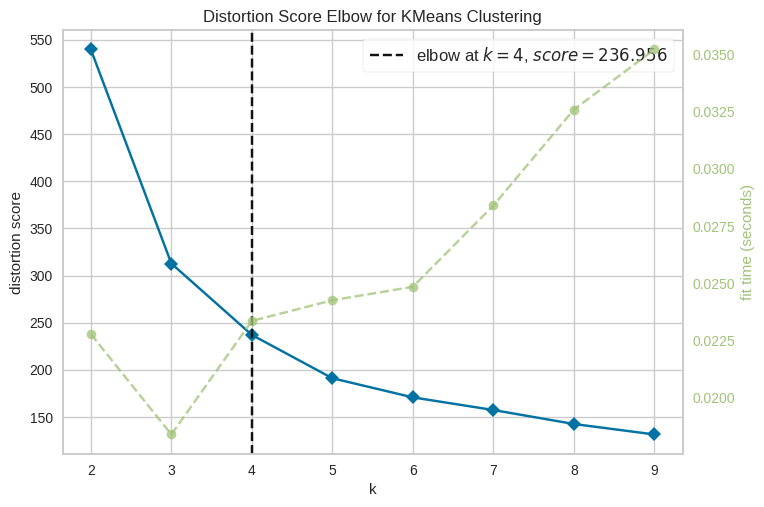

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [376]:
#Elbow Method with yellowbrick library
visualizer = KElbowVisualizer(model1, k=(2,10))
visualizer.fit(X_std)
visualizer.show()

In [378]:
K = range(2, 8)
fits = []
score = []

for k in K:
    model = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(data_cluster_normalize)
    fits.append(model)
    score.append(silhouette_score(data_cluster_normalize, model.labels_, metric='euclidean'))

<Axes: >

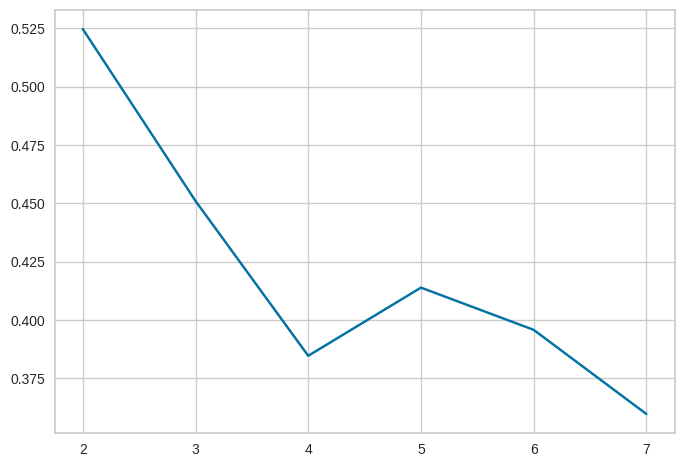

In [379]:
sns.lineplot(x = K, y = score)

In [380]:
# Kmeans n_cluster = 4
#Clustering Kmeans
kmeans_4 = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=100)
kmeans_4.fit(X_std)

KMeans(n_clusters=4, n_init=10, random_state=100)

In [387]:
# Masukin cluster ke dataset
df_cluster['cluster'] = kmeans_4.labels_
df_cluster.head()

,CustomerID,TransactionID,Qty,TotalAmount,cluster
0,1,17,60,623300,0
1,2,12,56,382300,3
2,3,15,56,446200,0
3,4,10,46,302500,2
4,5,7,27,268600,1


<Figure size 600x600 with 0 Axes>

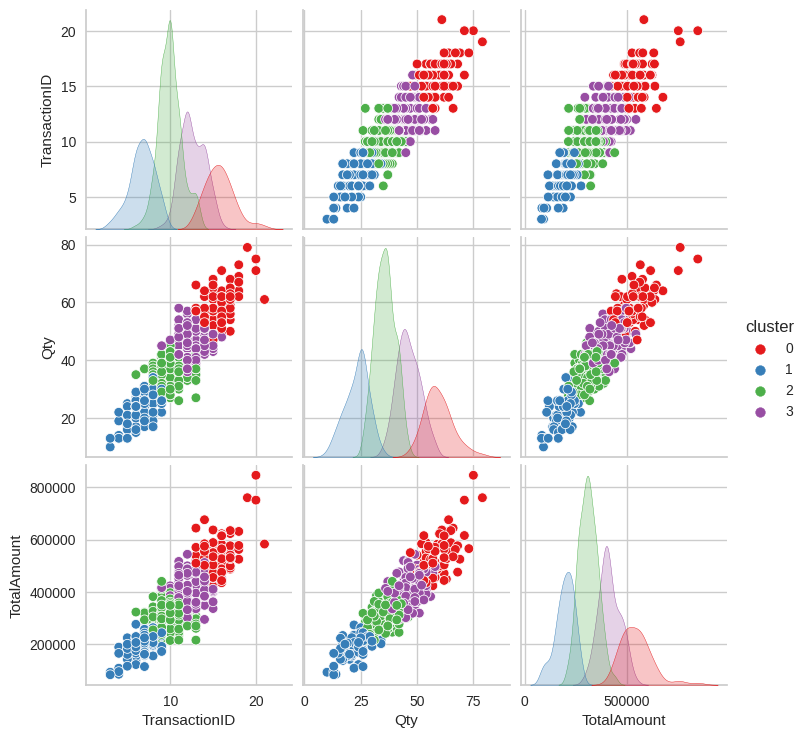

In [382]:
plt.figure(figsize=(6,6))
sns.pairplot(data=df_cluster,hue='cluster',palette='Set1')
plt.show()

In [389]:
df_cluster['CustomerID'] = df_cluster['CustomerID']
df_cluster_mean = df_cluster.groupby('cluster').agg({'CustomerID':'count','TransactionID':'mean','Qty':'mean','TotalAmount':'mean'})
df_cluster_mean.sort_values('CustomerID', ascending = False)

,CustomerID,TransactionID,Qty,TotalAmount
cluster,,,,
2,167,9.970060,35.730539,310515.568862
3,115,12.617391,46.130435,413627.826087
1,89,6.719101,23.292135,197086.516854
0,73,15.753425,59.465753,545172.602740


### Summary
* Cluster 2 <br>
    - Cluster dengan jumlah pelanggan paling banyak.
    - Karakteristik pelanggan menempati posisi ketiga dari setiap metriks (transaction, quantity, total amount).
<br> **Rekomendasi**:
        - Membangun hubungan baik dengan pelanggan.
        - Memberikan survey untuk mengembangkan minat pelanggan terbanyak.
* Cluster 3 <br>
    - Karakteristik pelanggan yang menempati posisi ke dua tertinggi pada setiap metriks.
<br> **Rekomendasi**:
        - Memberikan promo secara rutin untuk meningkatkan transaksi.
        - Melakukan upselling produk-produk dengan harga tinggi.
* Cluster 1 <br>
    - Karakteristik pelanggan dengan nilai terendah pada setiap metriksnya.
<br> **Rekomendasi**:
        - Memberikan discount price yang cukup besar untuk meningkatkan Transaksi pelanggan.
        - Memberikan promo pada transaksi dengan Quantity lebih tinggi.
        - Memberikan survey untuk mengetahui potensi pengembangan produk.
* Cluster 0 <br>
    - Cluster dengan jumlah pelanggan paling sedikit
    - Karakteristik pelanggan dengan nilai tertinggi pada setiap metriksnya.
<br> **Rekomendasi**:
        - Memberikan promo loyalti untuk mempertahankan transaksi
        - Memberikan survey kepuasan pelanggan.
        - Melakukan upselling produk dengan harga lebih tinggi
